<h1><b>Statistique en Bioinformatique : </b> TME4 </h1>
<br>
L’objectif de ce TME sont: 
<br>
<ul>
<li> objectif 1 : Utiliser les chaines de Markov pour comprendre les états phénotypiques de cellules cancéreuses.   </li> 
<li> objectif 2 : étudier la dynamique des proportions phénotypiques dans les lignées cellulaires du cancer du sein humain: SUM159 et SUM149</li>
</ul>
<br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**Soumission**</p>
<ul>
<li>Renomer le fichier TME4_subject_st.ipynb pour NomEtudiant1_NomEtudiant3.ipynb </li>
<li>Envoyer par email à nikaabdollahi@gmail.com, l’objet du email sera [SBAS-2019] TME4 (deadline 04/03/2018 23:59)</li>
</ul>
</div>


Nom etudiant 1 :
Alexis Trang
Nom etudiant 2 :
Yann Zhong

<h3>Introduction</h3>
<ul>
<li> Les cellules cancéreuses au sein des tumeurs existent souvent dans des états phénotypiques distincts.</li>
<li> Les sous-populations de cellules purifiées pour un état phénotypique reviennent vers des proportions d'équilibre dans le temps.</li>
<li> Cet équilibre peut s'expliquer par un modèle de Markov dans lequel les cellules passent de manière stochastique entre les états.  </li>
</ul>

<img src="img/CellStateTransition.png" />

<b>Exercice 1</b>:
Traduire les graphes de transition de la figure D en matrices de transition, 
$P_{149}$ et $P_{159}$. Verifier bien que les matrices et les vecteur  $\pi_{0}$ soitent normalisés.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.legend_handler import HandlerLine2D
import random
import math as mt

# Initial distribution, vector pi_0
pi0_149 = np.array([0.039, 0.033, 0.9280]) # red, green, blue (SL, basal, luminal)
pi0_159 = np.array([0.019, 0.973, 0.0062]) # red, green, blue (SL, basal, luminal)

# Matrices
# REMARK: The entry M[i,j] describes the transition FROM <ROW INDEX i> TO <COLUMN INDEX j>
p_149 = np.array([[0.61, 0.09, 0.3],[0.01, 0.9, 0.08],[0.01, 0, 0.99]])
p_159 = np.array([[0.58, 0.35, 0.07], [0.01, 0.99, 0],[0.04, 0.49, 0.47]]) 

# Normalize the vectors pi_0:
norm_pi0_149 = [i/sum(pi0_149) for i in pi0_149]
norm_pi0_159 = [j/sum(pi0_159) for j in pi0_159]

# Normalize the matrices:
norm_p_149 = np.zeros((3,3)) # previous error caused by np.zeros(3) :'(
norm_p_159 = np.zeros((3,3))

for s in range(3):
    norm_p_149[s] = [m/sum(p_149[s]) for m in p_149[s]]
    norm_p_159[s] = [n/sum(p_159[s]) for n in p_159[s]]

In [96]:
# Normalisation des matrices de transition et états initiaux
print(norm_pi0_149)
print(norm_pi0_159)
print(norm_p_149)
print(norm_p_159)

[0.039, 0.033, 0.928]
[0.019034261671007816, 0.9747545582047685, 0.006211180124223602]
[[0.61       0.09       0.3       ]
 [0.01010101 0.90909091 0.08080808]
 [0.01       0.         0.99      ]]
[[0.58 0.35 0.07]
 [0.01 0.99 0.  ]
 [0.04 0.49 0.47]]


<b>Exercice 2</b>: Déterminer les états stationnaires 
$\pi^\star_{149}$ et $\pi^\star_{159}$ 
Est-ce que les valeurs que vous trouvez sont cohérents avec les 
valeurs expérimentales en Fig. 1?

In [9]:
# Determine the eigenvalues and eigenvectors of the matrices:
val_149,vec_149 = np.linalg.eig(np.transpose(norm_p_149)) # right eigenvectors ==> multiplication de ligne de la matrice par vecteur colonne
val_159,vec_159 = np.linalg.eig(np.transpose(norm_p_159)) # donc les lignes (pas les colonnes) doivent être normalisées

# Select the eigenvector corresponding to the stationary state:
for i in range(len(val_149)):
    if abs(1-val_149[i]) <= 1e-4:
        ss_149 = i
for j in range(len(val_159)):
    if abs(1-val_159[j]) <= 1e-4:
        ss_159 = j        

ss_vec_149 = vec_149[:,ss_149] # vec_149[ss_149] is wrong! Taking the wrong dimensions for the matrix multiplication
ss_vec_159 = vec_159[:,ss_159]
print("The stationary eigenvalue for SUM149 is number",ss_149+1, "and its eigenvector is",ss_vec_149)
print("The stationary eigenvalue for SUM159 is number",ss_159+1, "and its eigenvector is",ss_vec_159,"\n")

# Print out the normalized vector and compare it to Fig. 1B:

norm_ss_vec_149 = [np.abs(i)/sum(np.abs(ss_vec_149)) for i in ss_vec_149]   # get rid of negatives with abs
norm_ss_vec_159 = [np.abs(j)/sum(np.abs(ss_vec_159)) for j in ss_vec_159]  

print("Normalized eigenvector for SUM149 is",norm_ss_vec_149)
print("Normalized eigenvector for SUM159 is",norm_ss_vec_159,"\n")
print("Comparing the proportions to that of the figure above, we have extremely similar red/green/blue proportions, such that we seem to have succesfully found the steady state.")

The stationary eigenvalue for SUM149 is number 2 and its eigenvector is [0.02629777 0.02603479 0.99931507]
The stationary eigenvalue for SUM159 is number 1 and its eigenvector is [-0.0241057  -0.99970435 -0.00318377] 

Normalized eigenvector for SUM149 is [0.025006251562890575, 0.024756189047263406, 0.9502375593898459]
Normalized eigenvector for SUM159 is [0.0234720992028347, 0.973427812223206, 0.0031000885739592963] 

Comparing the proportions to that of the figure above, we have extremely similar red/green/blue proportions, such that we seem to have succesfully found the steady state.


<b>Exercice 3</b>: Déterminer les matrices de transition $P_{149,159}^n$ pour $n$ 
iterations avec $n=2,4,8,16,32,64$, imprimer toutes les matrices. Computer les vectors $\pi^{(n)}$ et les comparer avec
$\pi^\star_{149,159}$. Utilisez le $\pi^0$ du papier de Gupta, page 2, ci-dessous.

In [10]:
pi_zero_149 = np.array([[0.039, 0.928, 0.033]])
pi_zero_159 = np.array([[0.019, 0.0062, 0.973]])

# Matrix P**n (using a function is recommended):
from copy import * # alternatively, import copy is fine too

def Ppowern(matrix,n):
    Pn=deepcopy(matrix)
    if n==0:
        return np.identity(matrix.shape[0])
    for i in range(n-1):
        Pn=Pn@matrix
    return Pn

# Print the matrix P**n where n = 2,4,8,16,32,64:
print("Transition matrices for SUM149:")
for i in range(1,7):
    n = 2**i
    print("n =",n)
    print(Ppowern(norm_p_149,n))
print("\n")

print("Transition matrices for SUM159:")
for i in range(1,7):
    n = 2**i
    print("n =",n)
    print(Ppowern(norm_p_159,n))

Transition matrices for SUM149:
n = 2
[[3.76009091e-01 1.36718182e-01 4.87272727e-01]
 [1.61524334e-02 8.27355372e-01 1.56492195e-01]
 [1.60000000e-02 9.00000000e-04 9.83100000e-01]]
n = 4
[[0.15138753 0.16496035 0.68365212]
 [0.02194114 0.68686609 0.29119277]
 [0.02176028 0.0038169  0.97442282]]
n = 8
[[0.04141407 0.14088804 0.81769789]
 [0.02472868 0.47651589 0.49875543]
 [0.0245817  0.00993056 0.96548774]]
n = 16
[[0.0252995  0.08109033 0.89361016]
 [0.02506798 0.23550429 0.73942773]
 [0.02499693 0.01778317 0.9572199 ]]
n = 32
[[0.02501034 0.03703989 0.93794977]
 [0.02502124 0.07064441 0.90433435]
 [0.02500575 0.02323742 0.95175682]]
n = 64
[[0.02500644 0.02533858 0.94965498]
 [0.02500696 0.02693182 0.94806122]
 [0.02500623 0.02468418 0.95030959]]


Transition matrices for SUM159:
n = 2
[[3.427e-01 5.838e-01 7.350e-02]
 [1.570e-02 9.836e-01 7.000e-04]
 [4.690e-02 7.294e-01 2.237e-01]]
n = 4
[[0.1300561  0.82790484 0.04203906]
 [0.02085574 0.9771452  0.00199906]
 [0.03801574 0.907984

In [11]:
# Computing pi*n values from Gupta paper

# NOT the same values as in exercice 1, be careful
pi_zero_149 = np.array([[0.039, 0.928, 0.033]])
pi_zero_159 = np.array([[0.019, 0.0062, 0.973]])

# these ones are the ones from exercice 1, use them instead to check the difference
# Initial distribution, vector pi_0
pi0_149 = np.array([0.039, 0.033, 0.9280]) # red, green, blue (SL, basal, luminal)
pi0_159 = np.array([0.019, 0.973, 0.0062]) # red, green, blue (SL, basal, luminal)


for i in range(1,7):
    n=2**i
    Pn=Ppowern(norm_p_149,n)

print("Pi^n values after 64 steps:")
print("Pi^n for 149:",pi0_149@Pn)
print("Pi^n for 159:",pi0_159@Pn,"\n")

print("Steady state obtained from exercice 2: ")
print("Normalised steady state eigenvector for 149:",norm_ss_vec_149)
print("Normalised steady state eigenvector for 159:",norm_ss_vec_159)

Pi^n values after 64 steps:
Pi^n for 149: [0.02500626 0.02478388 0.95020986]
Pi^n for 159: [0.02496194 0.02683913 0.94639893] 

Steady state obtained from exercice 2: 
Normalised steady state eigenvector for 149: [0.025006251562890575, 0.024756189047263406, 0.9502375593898459]
Normalised steady state eigenvector for 159: [0.0234720992028347, 0.973427812223206, 0.0031000885739592963]


<b> Exercice 4 </b>:
 Ecrire une fonction pour déterminer les
$(\pi^{(t)})_{t=1:n}$ d'une chaine de Markov à trois états. Appliquer
pour $P_{149}$ et $P_{159}$, pour les conditions initiales 
$\pi^{(0)}\in\{ (0.998,0.001,0.001), (0.001,0.998,0.001), 
(0.001,0.001,0.998) \}$ et pour $n=20$ itérations de la chaine 
de Markov. Visualiser graphiquement les résultats.


In [12]:
# Starting ftom the initial probabilities pi_0 and the transition matrix M, make a function
# returning the list of probability vectors pi_0, pi_1, pi_2, pi_3, ..., pi_n. 

pi_0 = np.array([0.998, 0.001, 0.001])
pi_0_1 = np.array([0.001, 0.998, 0.001])
pi_0_2 = np.array([0.001, 0.001, 0.998])

# The "simple" version that doesn't store in an array, just gets the final results
def tri_markov_simple(pi_initial,transition,iterations):
    return pi_initial@Ppowern(transition,iterations)

# The "complete" version that stores in an array, able to get plotted
def tri_markov_stored(pi_initial,transition,iterations):
    
    states = np.zeros((iterations,len(pi_initial)))   # tri-state Markov process
    
    for i in range(1,iterations):
        states[i] = pi_initial@Ppowern(transition,i)
    
    return states

# FIRST INITIAL CONDITION
pi_20_149_0 = tri_markov_stored(pi_0,norm_p_149,20)
pi_20_159_0 = tri_markov_stored(pi_0,norm_p_159,20)

# SECOND INITIAL CONDITION
pi_20_149_1 = tri_markov_stored(pi_0_1,norm_p_149,20)
pi_20_159_1 = tri_markov_stored(pi_0_1,norm_p_159,20)

# THIRD INITIAL CONDITION
pi_20_149_2 = tri_markov_stored(pi_0_2,norm_p_149,20)
pi_20_159_2 = tri_markov_stored(pi_0_2,norm_p_159,20)

In [13]:
# THIS PART IS NOT NECESSARY, JUST TO CHECK SOME VALUES QUICKLY
pi_20_149 = tri_markov_simple(pi_0,norm_p_149,20)
pi_20_159 = tri_markov_simple(pi_0,norm_p_159,20)

print("20 iterations, first initial condition")
print(pi_20_149)
print(pi_20_159,"\n")

pi_20_149 = tri_markov_simple(pi_0_1,norm_p_149,20)
pi_20_159 = tri_markov_simple(pi_0_1,norm_p_159,20)

print("20 iterations, second initial condition")
print(pi_20_149)
print(pi_20_159,"\n")

pi_20_149 = tri_markov_simple(pi_0_2,norm_p_149,20)
pi_20_159 = tri_markov_simple(pi_0_2,norm_p_159,20)

print("20 iterations, third initial condition")
print(pi_20_149)
print(pi_20_159,"\n")

20 iterations, first initial condition
[0.0250544  0.06334458 0.91160102]
[0.02349264 0.97339514 0.00311222] 

20 iterations, second initial condition
[0.02505232 0.16846329 0.80648438]
[0.02347161 0.97342858 0.0030998 ] 

20 iterations, third initial condition
[0.02500388 0.02018379 0.95481233]
[0.02347694 0.97341997 0.00310309] 



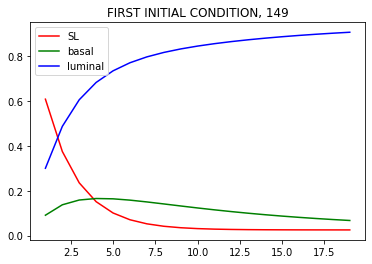

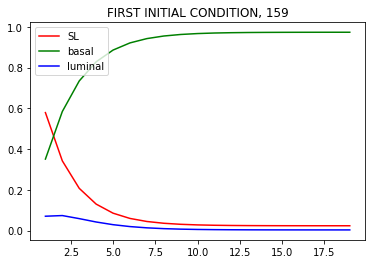

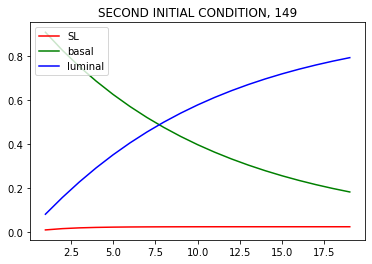

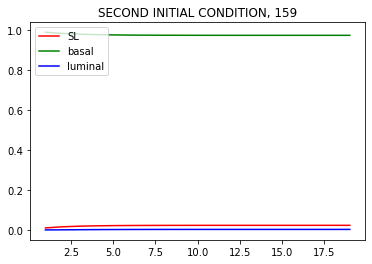

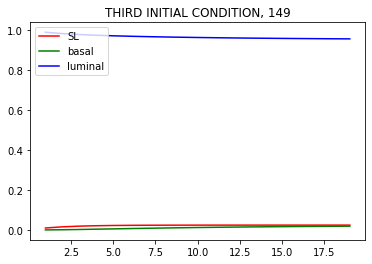

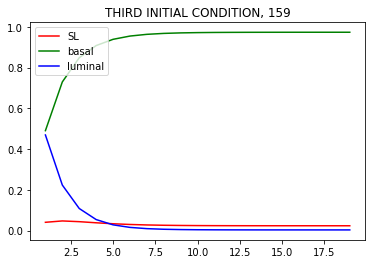

In [14]:
# For each of the three given pi_0, make a graph plotting the evolution of SL, basal and luminal 
#  cell populations, from t=0 to t=n=20

import matplotlib.pyplot as plt

def plot_graphs(iterations,states):
    t = np.arange(1,iterations,1)

    SL = []
    basal = []
    luminal = []

    for i in range(1,iterations):
        SL.append(states[i][0])
        basal.append(states[i][1])
        luminal.append(states[i][2])

    # red, green, blue (SL, basal, luminal)

    plt.plot(t,SL,'r',label = "SL")
    plt.plot(t,basal,'g',label = "basal")
    plt.plot(t,luminal,'b',label = "luminal")

    plt.legend(loc="upper left")

    plt.show()
    return

plt.title("FIRST INITIAL CONDITION, 149")
plot_graphs(20,pi_20_149_0)

plt.title("FIRST INITIAL CONDITION, 159")
plot_graphs(20,pi_20_159_0)

plt.title("SECOND INITIAL CONDITION, 149")
plot_graphs(20,pi_20_149_1)

plt.title("SECOND INITIAL CONDITION, 159")
plot_graphs(20,pi_20_159_1)

plt.title("THIRD INITIAL CONDITION, 149")
plot_graphs(20,pi_20_149_2)

plt.title("THIRD INITIAL CONDITION, 159")
plot_graphs(20,pi_20_159_2)

<b> Exercice 5 </b>:
Ecrire une fonction pour simuler la trajectoire stochastique
$(x_t)_{t=0:n}$ d'une seule réalisation de la chaine de Markov. 
Créer des populations de $N=10,100,1000,10000$ trajectoires. A chaque temps t, estimer 
la moyenne sur les 3 états, pour chaque population.


In [32]:
from random import random
# Simulate a trajectory
def simulate_traj(pi_0, M, T):
    
    # initial probabilities pi_0, transition matrix M, trajectory length T
    states="SBL"
    traj=[]
    M_cp=deepcopy(M)
    sum_pi=np.cumsum(pi_0)
    for i in range(T):
        rand=random()
        if 0<rand<sum_pi[0]:
            traj.append(states[0])
            continue
        for j in [1,2]:
            if sum_pi[j-1]<rand<sum_pi[j]:
                traj.append(states[j])
        pi_0=pi_0@M_cp
        M_cp=M_cp@M
        sum_pi=np.cumsum(pi_0)
        
    return traj  # list of T states "S", "B", "L" (Example: ["S", "S", "B", "S", "L", ...])

# Mean frequency of each state at each time t, based on N trajectories starting from pi_0
def mean_frequency(pi_0, M, T, N):
    
    # initial probabilities pi_0, transition matrix M, trajectory length T, number of trajectories N
    Pstates=np.zeros((3,T))
    l_traj=[]
    for i in range(N):
        l_traj.append(simulate_traj(pi_0,M,T))
    l_traj=np.array(l_traj)
    for position in range(T):
        Pstates[0][position]=list(l_traj[:,position]).count("S")/N
        Pstates[1][position]=list(l_traj[:,position]).count("B")/N
        Pstates[2][position]=list(l_traj[:,position]).count("L")/N
        
    return Pstates  # matrix(3,T)

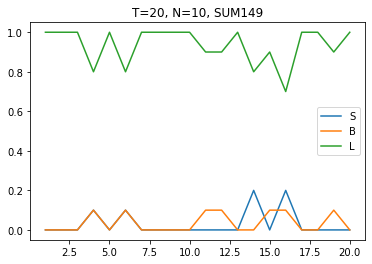

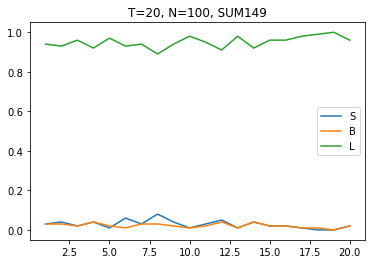

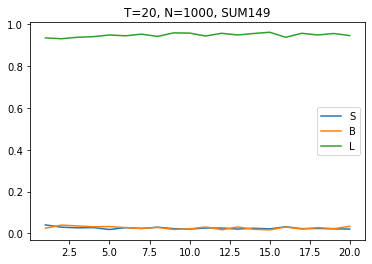

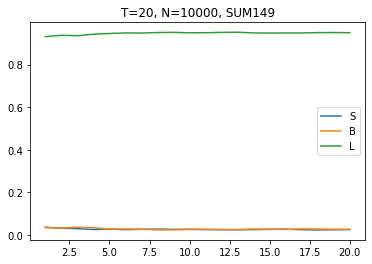

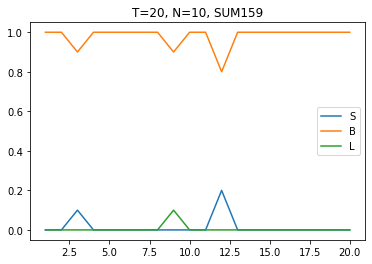

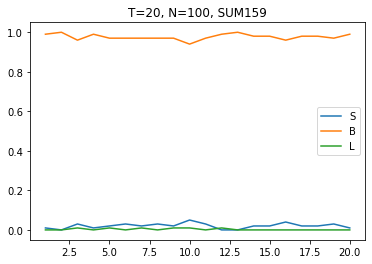

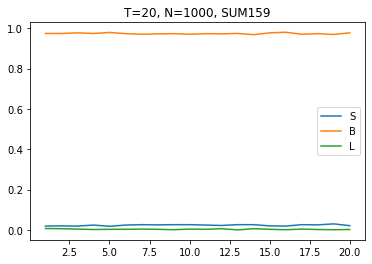

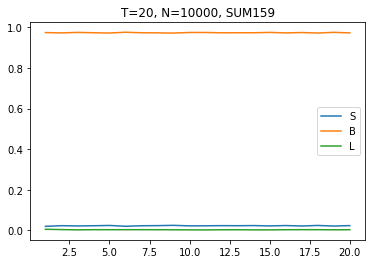

In [39]:
# Show the graph of the mean frequencies for the cases N= 10, 100, 1000, 10000

#----------------- SUM 149 -------------------#

T=range(1,21)
N=10
plt.title("T=20, N=10, SUM149")
freq=mean_frequency(norm_pi0_149,norm_p_149,20,N)
plt.plot(T,freq[0],T,freq[1],T,freq[2])
plt.legend(["S","B","L"])

plt.show()

T=range(1,21)
N=100
plt.title("T=20, N=100, SUM149")
freq=mean_frequency(norm_pi0_149,norm_p_149,20,N)
plt.plot(T,freq[0],T,freq[1],T,freq[2])
plt.legend(["S","B","L"])

plt.show()

T=range(1,21)
N=1000
plt.title("T=20, N=1000, SUM149")
freq=mean_frequency(norm_pi0_149,norm_p_149,20,N)
plt.plot(T,freq[0],T,freq[1],T,freq[2])
plt.legend(["S","B","L"])

plt.show()

T=range(1,21)
N=10000
plt.title("T=20, N=10000, SUM149")
freq=mean_frequency(norm_pi0_149,norm_p_149,20,N)
plt.plot(T,freq[0],T,freq[1],T,freq[2])
plt.legend(["S","B","L"])

plt.show()

#----------------- SUM 159 -------------------#

T=range(1,21)
N=10
plt.title("T=20, N=10, SUM159")
freq=mean_frequency(norm_pi0_159,norm_p_159,20,N)
plt.plot(T,freq[0],T,freq[1],T,freq[2])
plt.legend(["S","B","L"])

plt.show()

T=range(1,21)
N=100
plt.title("T=20, N=100, SUM159")
freq=mean_frequency(norm_pi0_159,norm_p_159,20,N)
plt.plot(T,freq[0],T,freq[1],T,freq[2])
plt.legend(["S","B","L"])

plt.show()

T=range(1,21)
N=1000
plt.title("T=20, N=1000, SUM159")
freq=mean_frequency(norm_pi0_159,norm_p_159,20,N)
plt.plot(T,freq[0],T,freq[1],T,freq[2])
plt.legend(["S","B","L"])

plt.show()

T=range(1,21)
N=10000
plt.title("T=20, N=10000, SUM159")
freq=mean_frequency(norm_pi0_159,norm_p_159,20,N)
plt.plot(T,freq[0],T,freq[1],T,freq[2])
plt.legend(["S","B","L"])

plt.show()

<b> Exercice 6 </b>: 
Ecrire une fonction pour calculer la probabilité d'une trajectoire
$(x_t)_{t=0:n}$. Pour vous faciliter, appliquez le log et utlisez la somme au
lieu du produit. Ensuite vous devez comparer les probabilités de 
deux chaines de Markov $P_{149}$ et $P_{159}$: visualisez les histogrammes pour les deux populations de taille $N=10000$ (géenérées avec $P_{149}$ et $P_{159}$). Est-ce que vous observez des différences entre les deux modèles? Comment est-ce que vous expliquez ces différences?

In [97]:
# Probability of a trajectory
def prob_traj(traj, pi_0, M):
    p_traj=0
    long=len(traj)
    freqs=np.log(mean_frequency(pi_0, M, long, 10000))
    states="SBL"
    for i in range(long):
        p_traj+=freqs["SBL".index(traj.pop(0))][i]
    return p_traj

# Make a histogram plotting the number of trajectories with a certain assigned probability

print(prob_traj(["S","S","S"],norm_pi0_149,norm_p_149))
print(prob_traj(["S","S","S"],norm_pi0_159,norm_p_159))

# This sections is incomplete because we weren't sure how 
# exactly to plot a histogram with the log probabilities we acquired...

-10.298945499722816
-11.697978749537302


[  0  20  40  60  80 100]


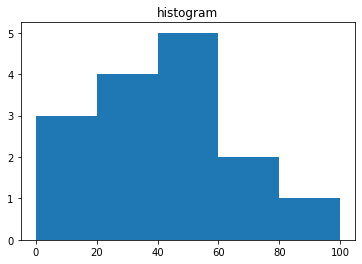

In [70]:
from matplotlib import pyplot as plt 
import numpy as np  

bins = np.arange(0,101,20)
print(bins)
   
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
plt.hist(a, bins) 
plt.title("histogram") 
plt.show()